2024-06-13 20:39:16.520 | INFO     | yolox_connector:__init__:31 - Model Summary: Params: 5.06M, Gflops: 15.36
2024-06-13 20:39:16.561 | INFO     | yolox_connector:__init__:36 - Using GPU.
2024-06-13 20:39:16.937 | INFO     | yolox_connector:__init__:45 - loaded checkpoint done.
2024-06-13 20:39:17.467 | INFO     | yolox_connector:__call__:73 - Infer time: 0.5217s
2024-06-13 20:39:17.469 | INFO     | yolox_connector:__call__:86 - ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot

Detections(xyxy=array([[121.70356, 136.48   , 550.91364, 420.50565],
       [132.4276 , 214.95425, 313.14066, 544.78125],
       [464.61447,  75.15128, 685.6994 , 170.31595]], dtype=float32), mask=None, confidence=array([0.9581966, 0.8542407, 0.7447926], dtype=float32), class_id=array([ 1, 16,  7]), tracker_id=None, data={'class_name': array(['bicycle', 'dog', 'truck'], dtype='<U7')})


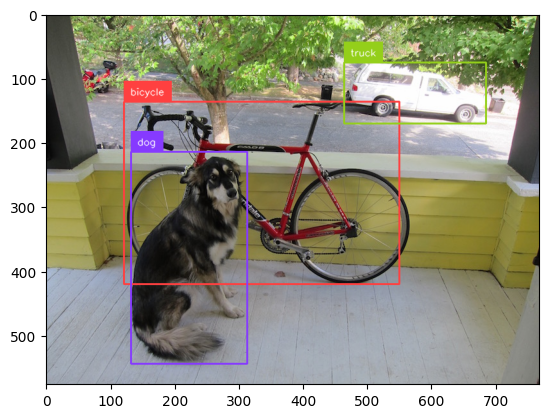

In [2]:
from yolox_connector import YOLOX
import cv2
import supervision as sv
import matplotlib.pyplot as plt

image = cv2.imread("/home/yosuke/home2/supervision/supervision/.idea/137108492-e9cf3290-f025-435c-ad17-20ea77f4d937.jpg")
model = YOLOX(model_path=None, exp_path=None,
              ckpt_path=None, tsize=640,
              nms=None, conf=0.5, class_names=None)
result = model(image)
detections = sv.Detections.from_yolox(result)
print(detections)
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_image = bounding_box_annotator.annotate(
    scene=image.copy(),
    detections=detections, 
)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)
plt.imshow(annotated_image[...,::-1])

In [ ]:
result[3]

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

image = cv2.imread("/home/yosuke/home2/supervision/supervision/.idea/137108492-e9cf3290-f025-435c-ad17-20ea77f4d937.jpg")
model = YOLO('yolov8s.pt')
result = model(image)[0]
detections = sv.Detections.from_ultralytics(result)
print(detections)

In [ ]:
len(detections)


In [ ]:
print(detections)